In [ ]:
from termcolor import colored
import jsonlines

In [1]:
max_duplicates = "--max_duplicates 10" # if true, each entity appears only once in the entire dataset.
prefix = "--prefix expand_" # suffix for the output files
version_name = "--version_name no-patterns"
wandb_project = "--wandb_project auto-limit"
experiment_suffix = "--experiment_suffix with_expansion"
superclass_tag = "--superclass_tag ORG"
target_tag = "--target_tag SCHOOL"
patterns_file = "--patterns school_patterns.json"
dataset_name = "--dataset_name schools"
dataset_path= f'--dataset_path data/schools'

In [ ]:
!python src/collect_data.py {max_duplicates} {prefix} {superclass_tag} {patterns_file}

In [ ]:
# make sure the spike matches make sense
! head -5 data/spike_matches/positive/0_schools.jsonl

In [ ]:
!python src/tag_dataset.py {prefix} {version_name} {superclass_tag} {target_tag} {dataset_name}

In [ ]:
# make sure the tagged data makes sense
with jsonlines.open("./data/schools/dataset_expand.jsonl", 'r') as f:
    for i, line in enumerate(f):
        color_text = [x[0] if x[1] == "O" else colored(x[0], 'red') if "ORG" in x[1] else colored(x[0], 'green') for x in line["sent_items"]]
        print(i, line["id"], " ".join(color_text))
        print()

In [ ]:
!python src/train.py {wandb_project} {experiment_suffix} {version_name}  {superclass_tag} {target_tag} {dataset_path} --epochs 3

In [21]:
!python src/evaluation.py {wandb_project} {experiment_suffix} {version_name}  {superclass_tag} {target_tag} {dataset_path}

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 645.38it/s]


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1494.23it/s]


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1329.41it/s]


Running Prediction: 100%|████████████████████████| 1/1 [00:00<00:00, 117.11it/s]
confusion matrix:
[[0.883 0.083 0.    0.    0.033]
 [0.051 0.763 0.    0.021 0.165]
 [0.019 0.009 0.833 0.06  0.079]
 [0.    0.    0.078 0.773 0.149]
 [0.001 0.012 0.005 0.011 0.972]]
span recall:
0.7666666666666667 ( 46 / 60) 
classification report:
              precision    recall  f1-score   support

    B-SCHOOL       0.72      0.88      0.79        60
       B-ORG       0.75      0.76      0.76       236
    I-SCHOOL       0.80      0.83      0.81       215
       I-ORG       0.79      0.77      0.78       322
           O       0.98      0.97      0.97      4596

    accuracy                           0.94      5429
   macro avg       0.81      0.84      0.82      5429
weighted avg       0.95      0.94      0.95      5429

parsed classification report:
{'B-SCH': ['OOL', '0.72', '0.88', '0.79', '60'], 'B-ORG': ['0.75', '0.76', '0.76', '236'], 'I-SCH': ['OOL', '0.80', '0.83', '0.81', '215'], 'I-ORG': 

In [17]:
f"python src/evaluation.py {wandb_project} {experiment_suffix} {version_name}  {superclass_tag} {target_tag} {dataset_path}"

'python src/evaluation.py --wandb_project bigger_hearst --experiment_suffix with_expansion --version_name expand  --superclass_tag ORG --target_tag SCHOOL --dataset_path data/schools'

[[0.883,0.083,0.,0.,0.033],[0.051,0.763,0.,0.021,0.165],[0.019,0.009,0.833,0.06,0.079],[0.,0.,0.078,0.773,0.149],[0.001,0.012,0.005,0.011,0.972]]


IndexError: tuple index out of range

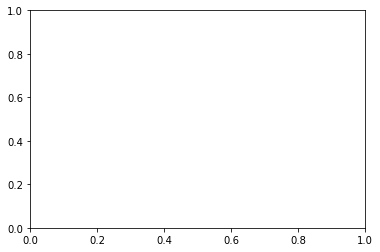

In [23]:
%matplotlib inline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

LABELS = [f"B-SCHOOL",
          f"B-ORG",
          f"I-SCHOOL",
          f"I-ORG",
          "O"]
matrix = """[[0.883 0.083 0.    0.    0.033]
 [0.051 0.763 0.    0.021 0.165]
 [0.019 0.009 0.833 0.06  0.079]
 [0.    0.    0.078 0.773 0.149]
 [0.001 0.012 0.005 0.011 0.972]]"""
matrix = matrix.replace("\n", ",").replace("   ", ",").replace("  ", ",").replace(", ", ",").replace(" ", ",")
matrix = np.array(matrix)
print(matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=LABELS)
disp.plot()
plt.show()

In [ ]:
[[0.883,0.083,0.,0.,0.033],[0.051,0.763,0.,0.021,0.165],[0.019,0.009,0.833,0.06,0.079],[0.,0.,0.078,0.773,0.149],[0.001,0.012,0.005,0.011,0.972]]